# Introduction
In this kernel I will go through alomst all the machine learning and deep learning ways to complete any NLP task. Here I will be using spam classifier example in which we have to determine whether the message is spam or not.<br>
This notebook will be a helpful guide for all the beginners who have not much expereince in the NLP problems. I have used several different machine learning algoriths and deep learning models so that you can get to know about each of them. But before diving into it, I will also go through some EDA and data preprocessing steps.  

# Table of Contents
<ul>
    <li>Importing Libraries</li>
    <li>Reading the data</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Cleaning</li>
    <li>Machine Learning Way</li>
    <ul>
        <li>Naive Bayes</li>
        <li>Logistic Regression</li>
        <li>KNN Classifier</li>
    </ul>
    <li>Deep Learning Way</li>
    <ul>
        <li>Simple RNN</li>
        <li>LSTM</li>
        <li>Bidirectional RNN</li>
    </ul>
    <li>Summary</li>
</ul>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, SimpleRNN, Bidirectional
from keras.optimizers import Adam

# Reading the data

In [2]:
df = pd.read_csv('spam-text-message-classification/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Exploratory Data Analysis

### Let's see how many messages are spam and not spam

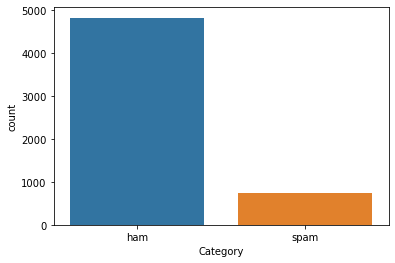

In [4]:
sns.countplot(x='Category', data = df)

This shows dataset contains very less spam messages.

### Length of tweet

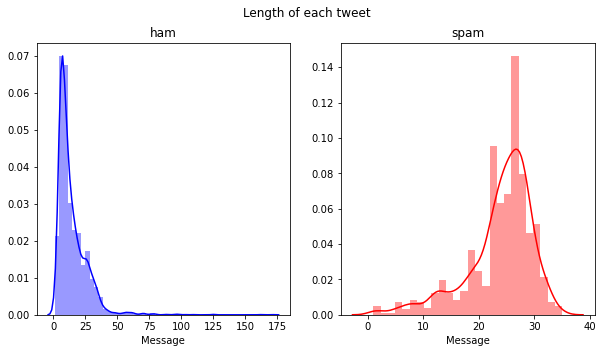

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['Category']=='ham']['Message'].str.split().map(lambda x : len(x))
sns.distplot(word,ax=ax1,color='blue')
ax1.set_title('ham')
word=df[df['Category']=='spam']['Message'].str.split().map(lambda x : len(x))
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('spam')
fig.suptitle('Length of each tweet')
plt.show()

### Displaying most common words

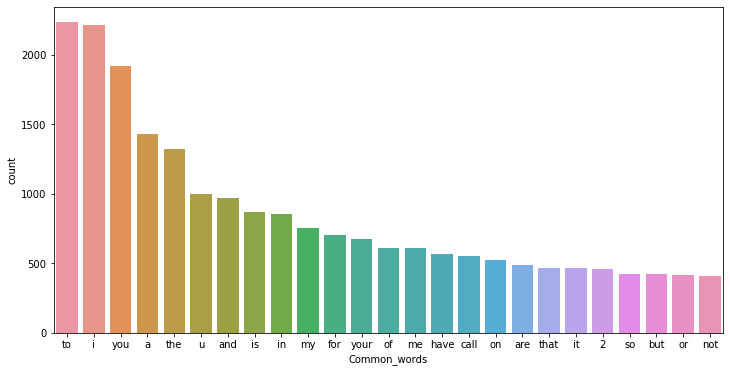

In [6]:
df['temp_list'] = df['Message'].apply(lambda x : str(x).lower().split())
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common_words', 'count']
sns.barplot(x=temp['Common_words'], y=temp['count'], ax=axes)
plt.show()

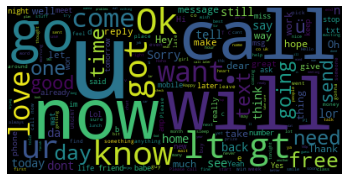

In [7]:
from wordcloud import WordCloud, STOPWORDS
text = df['Message'].values
cloud = WordCloud(stopwords = STOPWORDS,max_words = 200,).generate(" ".join(text))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Data Cleaning
Now we will do some data cleaning steps so that we can get better results. After applying all the steps we can use the data for both machine learning and deep learning way.

### First, we will remove all the punctuation marks and numbers and will convert into lowercase.

In [8]:
def clean(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    return text

In [9]:
df['Message'] = df['Message'].apply(lambda x : clean(x))

### Then we will remove all the stopwords and will apply stemming to the rest of the text.

In [10]:
ps = PorterStemmer()

In [11]:
def stemming(text):
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [12]:
df['Message'] = df['Message'].apply(lambda x : stemming(x))

### Now as we can see the Category column is in text data but we can't train using text data so we will convert it into dummy variables.

In [13]:
y = pd.get_dummies(df['Category'])

In [14]:
y=y.iloc[:,1].values

In [15]:
X = df['Message'].values
X

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
       ..., 'piti mood suggest',
       'guy bitch act like interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

# Machine Learning Way
After applying all the data cleaning steps, we can't directly use a text data, we first have to convert it into vectorial form. So we can convert text data into vector form through many ways. Here I will be using two techniques and that are Bag of Words and TF-IDF.

### Bag of Words

In [16]:
cv = CountVectorizer(max_features=5000)
X1 = cv.fit_transform(X)

### TF-IDF

In [17]:
cv2 = TfidfVectorizer(max_features=5000)
X2 = cv2.fit_transform(X)

### Splitting the data into train and test set

In [18]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state=3) 
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20, random_state=3)

## Naive Bayes

In [19]:
spam_detect = MultinomialNB().fit(X1_train, y_train)
spam_detect2 = MultinomialNB().fit(X2_train, y_train)

In [20]:
y_pred = spam_detect.predict(X1_test)
y_pred2 = spam_detect2.predict(X2_test)

In [21]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.9838565022421525

In [22]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.9838565022421525

## Logistic Regression

In [23]:
spam_detect3 = LogisticRegression().fit(X1_train, y_train)
spam_detect4 = LogisticRegression().fit(X2_train, y_train)

In [24]:
y_pred3 = spam_detect3.predict(X1_test)
y_pred4 = spam_detect4.predict(X2_test)

In [25]:
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy3

0.9829596412556054

In [26]:
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.9632286995515695

## KNN Classifier

In [27]:
params = {'n_neighbors' : (4,5,6,10,15,20), }
grid_KNN = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, verbose=1)
grid_KNN.fit(X1_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': (4, 5, 6, 10, 15, 20)}, verbose=1)

In [28]:
print(grid_KNN.best_params_)

{'n_neighbors': 5}


In [29]:
spam_detect5 = KNeighborsClassifier(n_neighbors=5).fit(X1_train, y_train)
spam_detect6 = KNeighborsClassifier(n_neighbors=5).fit(X2_train, y_train)

In [30]:
y_pred5 = spam_detect5.predict(X1_test)
y_pred6 = spam_detect6.predict(X2_test)

In [31]:
accuracy5 = accuracy_score(y_test, y_pred5)
accuracy5

0.9201793721973094

In [32]:
accuracy6 = accuracy_score(y_test, y_pred6)
accuracy6

0.915695067264574

### Let's see using using which vectorial coversion technique and which classifier gave the best result

In [33]:
label = ['Naive Bayes', 'Logistic Regression', 'KNN']
bow = [accuracy1, accuracy3, accuracy5]
tfidf = [accuracy2, accuracy4, accuracy6]

In [34]:
x = np.arange(len(label))
width = 0.25

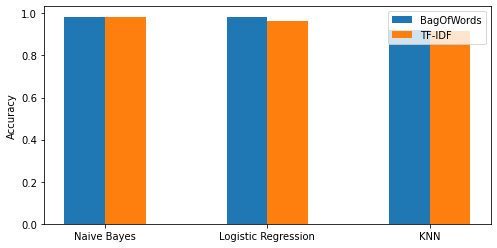

In [35]:
fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x-width/2, bow, width, label='BagOfWords')
rects2 = ax.bar(x+width/2, tfidf, width, label='TF-IDF')

ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

plt.show()

### So we can observe almost both the conversion technique gives the same result and Naive Bayes classifier gives the best result.

# Deep Learning Way
Next we will talk about the deep learning way.<br>
Now here we will use the same data which we got after applying data cleaning steps. But now we have to the process the data differently.

In [36]:
#Dictionary size
vocab_size=5000

In [37]:
epochs = 10 #Train for 20 epochs for better accuracy
batch_size = 32

Just as we converted our text data into vector form previously, here also we will convert our text data but using different technique.<br>
Firstly, we will convert our data into one hot representation.<br> Then we will do padding i.e., we will make all the sentence length to be equal.

In [38]:
encoded_docs = [one_hot(word, vocab_size) for word in X]

In [39]:
max_len = len(X.max())
pad_docs = pad_sequences(encoded_docs, maxlen = max_len, padding='post')

### Then again we will split the data into train and test set.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(pad_docs, y, test_size = 0.20, random_state=3) 

## Simple RNN Model

In [41]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length = max_len))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(100, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(SimpleRNN(100, return_sequences=True))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

In [42]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 73, 100)           500000    
_________________________________________________________________
dropout (Dropout)            (None, 73, 100)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 73, 100)           20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 100)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 73, 100)           20100     
_________________________________________________________________
dense (Dense)                (None, 73, 1024)          103424    
_________________________________________________________________
dropout_2 (Dropout)          (None, 73, 1024)          0

In [43]:
model1.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['acc'])

In [44]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
140/140 [==============================] - 17s 121ms/step - loss: 0.2561 - acc: 0.9243 - val_loss: 0.1474 - val_acc: 0.9674
Epoch 2/10
140/140 [==============================] - 15s 110ms/step - loss: 0.2216 - acc: 0.9426 - val_loss: 0.1545 - val_acc: 0.9582
Epoch 3/10
140/140 [==============================] - 15s 107ms/step - loss: 0.2447 - acc: 0.9333 - val_loss: 0.3121 - val_acc: 0.8886
Epoch 4/10
140/140 [==============================] - 15s 110ms/step - loss: 0.1248 - acc: 0.9636 - val_loss: 0.1080 - val_acc: 0.9706
Epoch 5/10
140/140 [==============================] - 16s 115ms/step - loss: 0.1123 - acc: 0.9743 - val_loss: 0.1578 - val_acc: 0.9604
Epoch 6/10
140/140 [==============================] - 16s 114ms/step - loss: 0.1013 - acc: 0.9798 - val_loss: 0.1589 - val_acc: 0.9642
Epoch 7/10
140/140 [==============================] - 15s 104ms/step - loss: 0.0846 - acc: 0.9833 - val_loss: 0.1866 - val_acc: 0.9640
Epoch 8/10
140/140 [==============================] - 1

## LSTM Model

In [45]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 100, input_length = max_len))
model2.add(Dropout(0.2))
model2.add(LSTM(100, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(100, return_sequences = True))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 73, 100)           500000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 73, 100)           80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 73, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 73, 100)           80400     
_________________________________________________________________
dense_3 (Dense)              (None, 73, 1024)          103424    
_________________________________________________________________
dropout_6 (Dropout)          (None, 73, 1024)         

In [47]:
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

In [48]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
140/140 [==============================] - 4s 27ms/step - loss: 0.2541 - acc: 0.9193 - val_loss: 0.1032 - val_acc: 0.9760
Epoch 2/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0970 - acc: 0.9772 - val_loss: 0.0830 - val_acc: 0.9810
Epoch 3/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0448 - acc: 0.9900 - val_loss: 0.1278 - val_acc: 0.9775
Epoch 4/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0627 - acc: 0.9855 - val_loss: 0.1260 - val_acc: 0.9688
Epoch 5/10
140/140 [==============================] - 3s 24ms/step - loss: 0.0433 - acc: 0.9916 - val_loss: 0.1596 - val_acc: 0.9684
Epoch 6/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0233 - acc: 0.9953 - val_loss: 0.1825 - val_acc: 0.9751
Epoch 7/10
140/140 [==============================] - 3s 23ms/step - loss: 0.0161 - acc: 0.9964 - val_loss: 0.1694 - val_acc: 0.9750
Epoch 8/10
140/140 [==============================] - 3s 24ms/step - 

## Bidirectional RNN Model

In [49]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 100, input_length = max_len))
model3.add(Dropout(0.2))
model3.add(Bidirectional(LSTM(100, return_sequences = True)))
model3.add(Dropout(0.2))
model3.add(Bidirectional(LSTM(100, return_sequences = True)))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

In [50]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 73, 100)           500000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 73, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 73, 200)           160800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 73, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 73, 200)           240800    
_________________________________________________________________
dense_6 (Dense)              (None, 73, 1024)          205824    
_________________________________________________________________
dropout_10 (Dropout)         (None, 73, 1024)         

In [51]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

In [52]:
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
140/140 [==============================] - 6s 42ms/step - loss: 0.2494 - acc: 0.9303 - val_loss: 0.0584 - val_acc: 0.9883
Epoch 2/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0815 - acc: 0.9858 - val_loss: 0.0711 - val_acc: 0.9849
Epoch 3/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0324 - acc: 0.9943 - val_loss: 0.0600 - val_acc: 0.9849
Epoch 4/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0329 - acc: 0.9893 - val_loss: 0.1246 - val_acc: 0.9814
Epoch 5/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0188 - acc: 0.9973 - val_loss: 0.0895 - val_acc: 0.9835
Epoch 6/10
140/140 [==============================] - 6s 40ms/step - loss: 0.0125 - acc: 0.9983 - val_loss: 0.0925 - val_acc: 0.9858
Epoch 7/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0117 - acc: 0.9984 - val_loss: 0.1587 - val_acc: 0.9743
Epoch 8/10
140/140 [==============================] - 4s 32ms/step - 

### Let us compare all the three models

In [53]:
metrics1 = pd.DataFrame(model1.history.history)
metrics2 = pd.DataFrame(model2.history.history)
metrics3 = pd.DataFrame(model3.history.history)

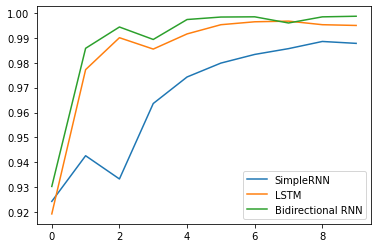

In [54]:
metrics1['acc'].plot(label='SimpleRNN')
metrics2['acc'].plot(label='LSTM')
metrics3['acc'].plot(label='Bidirectional RNN')
plt.legend()
plt.show()

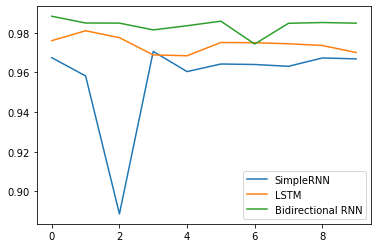

In [55]:
metrics1['val_acc'].plot(label='SimpleRNN')
metrics2['val_acc'].plot(label='LSTM')
metrics3['val_acc'].plot(label='Bidirectional RNN')
plt.legend()
plt.show()

### This clearly shows that Bidirectional RNN works best. Although simple LSTM models also performs good and can be used for many tasks.

# Summary

So, we come to an end. Some key points to note are:-
* Both ML and DL way has its own advantages and disadvantages.
* ML way is usually easier and a much faster way
* On the other hand DL way can be much slower. But it generally gives better results as compared to the previous one. 
* Each one have its pros and cons and it ultimately depends on your need and expectations.

In the end I would like to say that this is not a comparison notebook between ml and dl way. I have just tried to put information about practical approach for NLP problems as much as possible. So, if you are not familiar with deep learning then focus on ml part and vice versa and if you are familiar with both then you can work with anyone.<br>
![](https://cdn.wpforms.com/wp-content/uploads/2017/04/thank-you-page-examples.jpg)